In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/VO_TARVERDIAN')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
from utils.audio_features import AudioFeatureExtractor
from utils.mlp_model import MLPModelTrainer
import os
import pandas as pd

In [ ]:
zip_path = '/content/drive/MyDrive/VO_TARVERDIAN/data.zip'
extract_folder = '/content/data'
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


In [ ]:
#CONSTANT
TRAIN_PATH = "/content/data/data/train.csv"
Y_TRAIN_PATH = "/content/data/data/Y_train_ofTdMHi.csv"
X_SUBMIT_PATH = "/content/data/data/X_soumettre.csv"

X_TRAIN_DOSSIER_PATH = "/content/data/data/X_train"
X_SUBMIT_DOSSIER_PATH = "/content/data/data/X_test"
Y_SUBMIT_PATH = "/content/drive/MyDrive/VO_TARVERDIAN/submission_MLP.csv"

In [ ]:
y_train = pd.read_csv(Y_TRAIN_PATH)

In [ ]:
extractor = AudioFeatureExtractor()

# Prepare train data
train_features = extractor.extract_from_directory(X_TRAIN_DOSSIER_PATH)

train_features["File"] = train_features["File"].str.replace(r"^/content/data/data/X_train/", "", regex=True)
X_train_with_labels = pd.merge(train_features, y_train, left_on='File', right_on='id', how='inner')
X_train_with_labels.to_csv(TRAIN_PATH, index=False)

# Prepare test data
submit_features = extractor.extract_from_directory(X_SUBMIT_DOSSIER_PATH)
submit_features["File"] = submit_features["File"].str.replace(r"^/content/data/data/X_test/", "", regex=True)
submit_features.to_csv(X_SUBMIT_PATH, index=False)

Processing audio files:   0%|          | 0/23168 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Processing audio files:   0%|          | 1/23168 [00:15<102:28:40, 15.92s/it]/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
Processing audio files:   0%|          | 0/950 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your

Loading data...
Preparing data...
Class distribution: Class 0: 13718, Class 1: 9450
Class ratio: 1.45:1
Optimizing MLP model hyperparameters...
Starting grid search to optimize hyperparameters...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant'}
Best AUC score: 0.9823
Evaluating optimized model...
Model accuracy: 0.9486
ROC-AUC score: 0.9878

Confusion matrix:
[[2636  108]
 [ 130 1760]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      2744
         1.0       0.94      0.93      0.94      1890

    accuracy                           0.95      4634
   macro avg       0.95      0.95      0.95      4634
weighted avg       0.95      0.95      0.95      4634

Making predictions on submission data...
Creating visualizations...


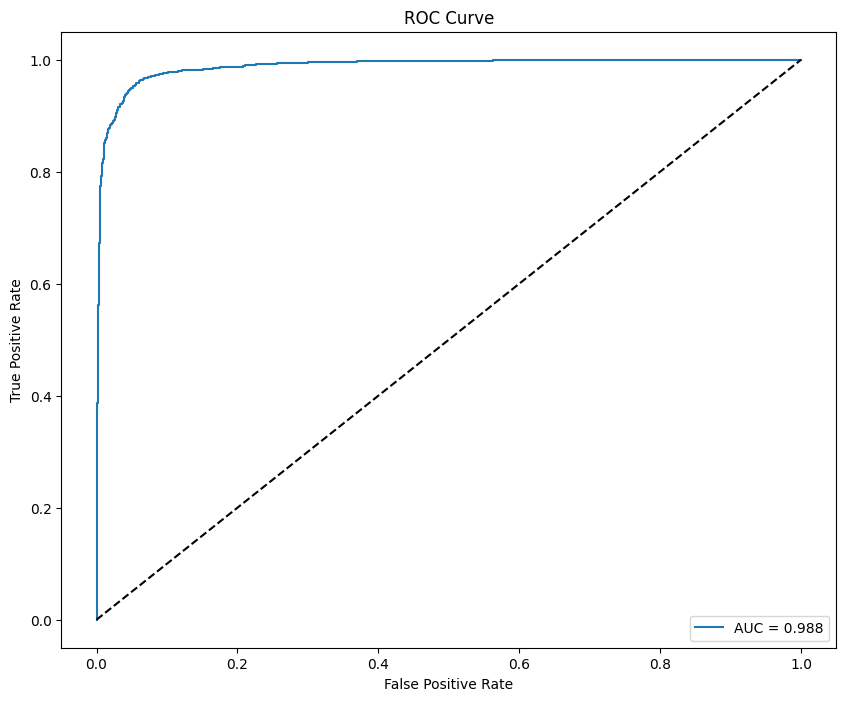

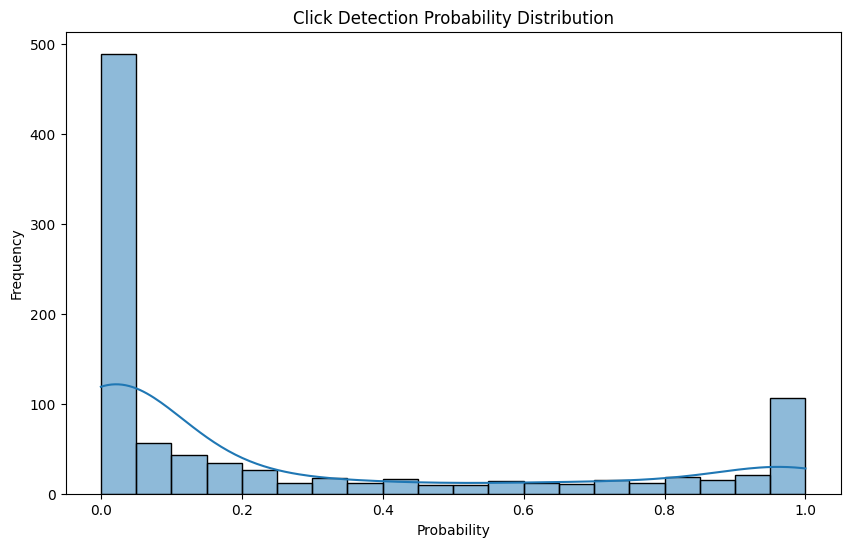

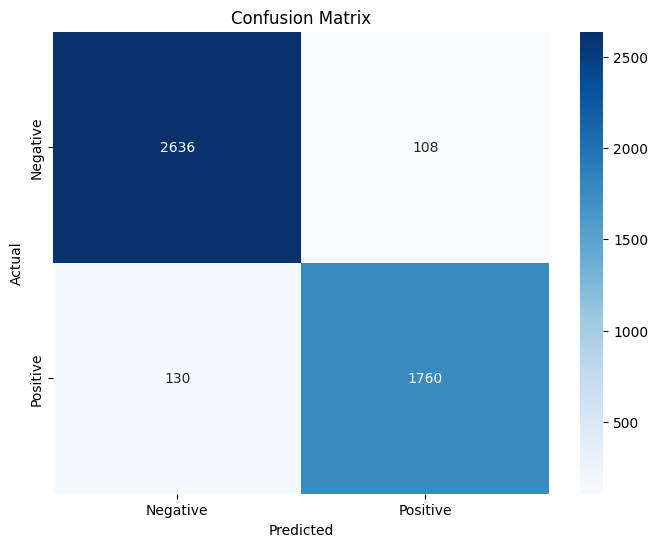

Submission file saved to /content/data/data/submission.csv
Model saved to best_model.joblib
Scaler saved to StandardScaler.joblib
Analysis completed successfully!


In [ ]:
trainer = MLPModelTrainer(random_state=42)
results = trainer.run_full_pipeline(
    train_path=TRAIN_PATH,
    x_submit_path=X_SUBMIT_PATH,
    y_submit_path=Y_SUBMIT_PATH
)

:### Score obtenu sur le site: 0,8651084903979762

---

